In [808]:
import numpy as np
import matplotlib.pyplot as plt

gravConst = 6.6743 * (10**(-11)) 
mass_earth = 5.972 * (10**24)
mass_sun = 1.989 * (10**30)
distance_sun = 200 * (10**9)
year = 60 * 60 * 24* 365.25
umlaufbahn = 2 * 147 * (10**9) * np.pi
velocity_earth = umlaufbahn / year * 300
steps = 10000
h = year / steps

Defining a general class for a Particle with a mass a position and a velocity.

Where the actual mass is equal to
$$ \frac{self.mass}{\sqrt{G}}$$

In [809]:
class Particle:
    def __init__(self, mass, coord, velocity):
        self.mass = mass
        self.coord = np.array([coord["x"], coord["y"], coord["z"]])
        self.velocity = np.array([velocity["x"],velocity["y"], velocity["z"]])
    
    def accelerate(self, force, dt):
        # delta is the velocity the particle is accelerated by in the timestep h
        a = force / self.mass
        delta = a * dt
        self.velocity = self.velocity + delta

    def move(self, dt):
        # delta is the distance the particle is moved by in the timestep h
        delta = self.velocity * dt
        self.coord = self.coord + delta

    def kineticEnergy(self):
        return self.mass / 2 * np.linalg.norm(self.velocity)**2

    def potEnergy(self, otherParticle):
        diff = np.subtract(self.coord, otherParticle.coord)
        radius = np.linalg.norm(diff)
        return - self.mass * otherParticle.mass / radius
    

Defining a function to calculate the gravitational force between 2 give Particles

In [810]:
def gravityForce(particle1, particle2):
    diff = np.subtract(particle2.coord, particle1.coord)
    radius = np.linalg.norm(diff)
    f_abs = particle1.mass * particle2.mass / (radius**2)
    #return force that applys on particle1
    return f_abs * (diff/radius) 
    




Create 2 Particles

In [811]:
star = Particle(mass_sun*np.sqrt(gravConst), {"x": 0, "y": 0, "z": 0 },{"x": 0, "y": 0, "z": 0 } )
#star = Particle(1000, {"x": 0, "y": 0, "z": 0 },{"x": 0, "y": 0, "z": 0 } )
planet = Particle(mass_earth*np.sqrt(gravConst), {"x": 0, "y": distance_sun, "z": 0 },{"x": velocity_earth, "y": 0, "z": 0 } )
#planet = Particle(1, {"x": 0, "y": 10, "z": 0 },{"x": 10, "y": 0, "z": 0 } )


Verlet Algorithm

In [812]:
def verlet(star, planet, h, steps):
    t_axis = np.linspace(0, steps*h, num=steps)
    star_x = np.zeros(steps)
    star_y = np.zeros(steps)
    star_z = np.zeros(steps)
    planet_x = np.zeros(steps)
    planet_y = np.zeros(steps)
    planet_z = np.zeros(steps)
    energy = np.zeros(steps)

    
    force = gravityForce(star, planet)
    star.accelerate(force, h/2)
    planet.accelerate(-force, h/2)
    for i in range(steps):
        
        star.move(h)
        planet.move(h)
        energy[i] += planet.potEnergy(star) + star.potEnergy(planet)
        force = gravityForce(star, planet)
        star.accelerate(force, h)
        planet.accelerate(-force, h)
        energy[i] += planet.kineticEnergy() + star.kineticEnergy()
        
        star_x[i] = star.coord[0]
        star_y[i] = star.coord[1]
        star_z[i] = star.coord[2]
        planet_x[i] = planet.coord[0]
        planet_y[i] = planet.coord[1]
        planet_z[i] = planet.coord[2]
    
    fig , ax = plt.subplots()
    ax.plot(star_x, star_y, 'r-', label='star')
    ax.plot(planet_x, planet_y, 'b-', label='planet')
    
    plt.legend()
    plt.show()

    fig2 , ax2 = plt.subplots()
    ax2.plot(t_axis, energy, 'r-', label='energy')
    plt.legend()
    plt.show()



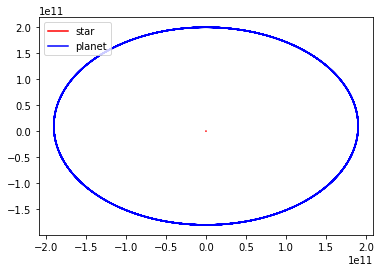

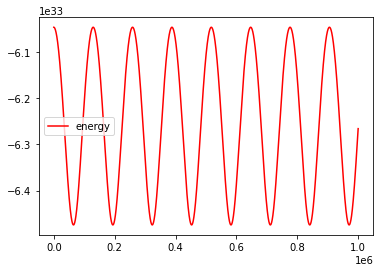

In [813]:
verlet(star, planet, 10, 100000)
#verlet(star, planet, 0.1, 60000)